In [93]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [126]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [127]:
plt.rc("font", family="Malgun Gothic")

In [137]:
traffic_accident_city_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_city_5`
    WHERE
        age_group = 65
"""

In [138]:
traffic_accident_city_df = client.query(traffic_accident_city_sql).to_dataframe()
traffic_accident_city_df = traffic_accident_city_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [139]:
traffic_accident_city_df

,서울,부산,강원,충북,충남,전북,전남,경북,경남,제주,대구,인천,광주,대전,울산,세종,경기
age_group,,,,,,,,,,,,,,,,,
65,5890.0,2027.0,1313.0,1438.8,1473.2,1361.2,2028.6,2600.4,2020.4,631.4,2040.6,1042.4,1084.4,1132.8,550.2,110.6,7338.6


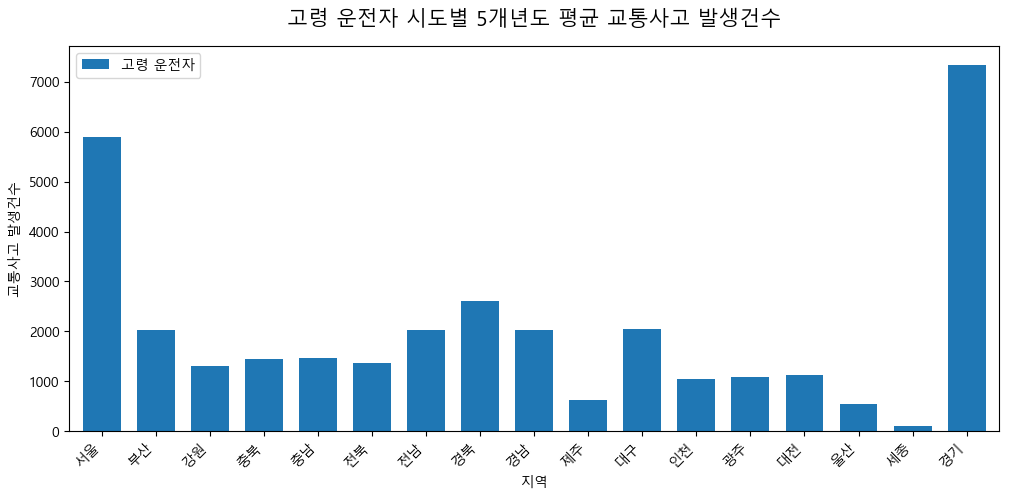

In [140]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("고령 운전자 시도별 5개년도 평균 교통사고 발생건수", size=15, pad=15)
plt.xlabel("지역")
plt.ylabel("교통사고 발생건수")
plt.xticks(rotation=45, ha="right")
plt.legend(["고령 운전자"], loc="best")
plt.savefig("./result/traffic_accident_city_v4.png", bbox_inches="tight")

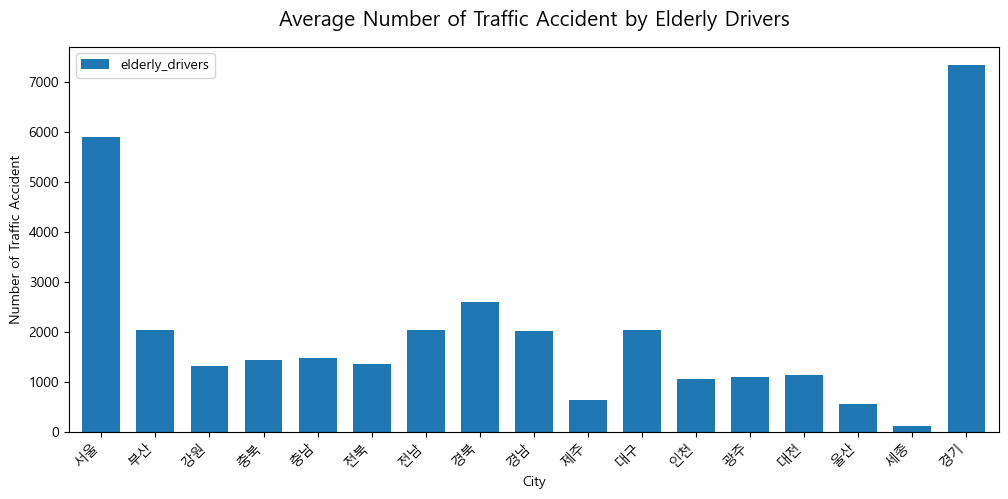

In [141]:
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("Average Number of Traffic Accident by Elderly Drivers", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Number of Traffic Accident")
plt.xticks(rotation=45, ha="right")
plt.legend(["elderly_drivers"], loc="best")
plt.savefig("./result/traffic_accident_city_v3.png", bbox_inches="tight")

In [142]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
total = traffic_accident_city_df.sum(axis=1)
traffic_accident_city_df = traffic_accident_city_df.div(total, axis=0) * 100

In [143]:
traffic_accident_city_df

,서울,부산,강원,충북,충남,전북,전남,경북,경남,제주,대구,인천,광주,대전,울산,세종,경기
age_group,,,,,,,,,,,,,,,,,
65,17.281038,5.947142,3.852293,4.221385,4.322313,3.99371,5.951836,7.629476,5.927778,1.852504,5.987044,3.058362,3.181589,3.323593,1.614266,0.324496,21.531176


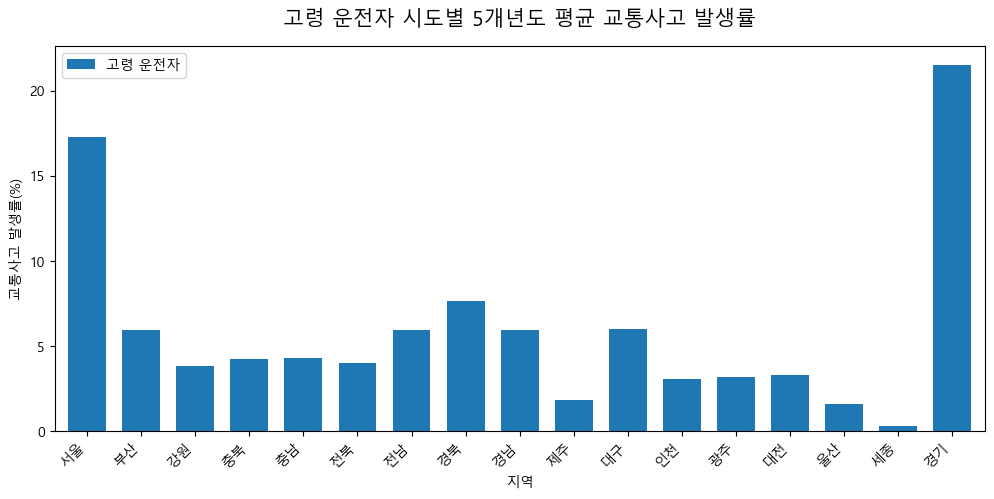

In [144]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("고령 운전자 시도별 5개년도 평균 교통사고 발생률", size=15, pad=15)
plt.xlabel("지역")
plt.ylabel("교통사고 발생률(%)")
plt.xticks(rotation=45, ha="right")
plt.legend(["고령 운전자"], loc="best")
plt.savefig("./result/traffic_accident_city_v2.png", bbox_inches="tight")

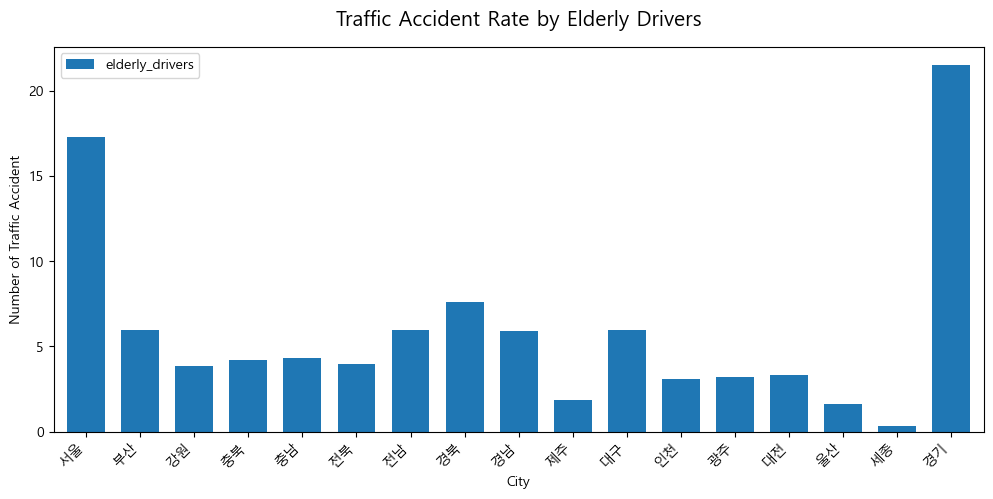

In [145]:
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("Traffic Accident Rate by Elderly Drivers", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Number of Traffic Accident")
plt.xticks(rotation=45, ha="right")
plt.legend(["elderly_drivers"], loc="best")
plt.savefig("./result/traffic_accident_city_v1.png", bbox_inches="tight")